# Data Mining Project 1
## EDA of Hotel Reviews in Europe Dataset
#### Created by Michael Crowder, Lauren Darr, Gerardo Garza, and Ariel Francisco
#### MSDS 7331-402
#### September 17, 2017

### Introduction and business understanding
“Can you make your trip cozier by using data science?” This is the question author Jason Liu proposes with the Kaggle data set ‘515k Hotel Reviews Data in Europe.’ This public data set was originally scraped from Booking.com. The opinions of 515,000 customers on 1,493 luxury European hotels were gathered for the purpose of exploration. However, this data set could provide a wealth of information to both hotel owners and customers alike. 

The prevalence of smart-phones makes it easy for customers to review businesses such as hotels and restaurants. Popular applications like 'Yelp' and 'Trip Advisor' have essentially put the power in the cusomters hands to determine the value of services and goods. If businesses to do not take the public opinions of their customers seriously they run the risk of losing much or most of potential future customers. 

The exploration of this collection of European hotel reviews will address questions such as: "Is there a relationship between the total number of reviews and the average score?" and "Do reviewers from specific nations tend to give more positive or negative reviews?"

The beginning of understanding the tendancies of reviewers is the beginning of understanding customers. As hotels begin to understand their customers more completely they can tailor their marketing, customer service, and interactions in order to build or optimize a positive brand image.  

### Bringing in data

In [1]:
# Let's use Pandas to save the data as a DF 
# Also import numpy and matplotlib for mathematics and visualizations, respectively
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Read csv file into dataframe 'hotel'
#May need to modify csv name, path, or directory
hotel = pd.read_csv('Hotel_Reviews.csv') 

#look at the first few rows of the data
hotel.head()

Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194    8/3/2017            7.7  Hotel Arena   
1                           194    8/3/2017            7.7  Hotel Arena   
2                           194   7/31/2017            7.7  Hotel Arena   
3                           194   7/31/2017            7.7  Hotel Arena   
4                           194   7/24/2017            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland                                         No Negative   
2           Australia    Rooms are nice but for elderly a bit difficul...   
3      United Kingdom    My room was dirty and I was afraid to walk ba...   
4         New Zealand    You When I booked with your company on line y...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   
3                                210                     1403   
4                                140                     1403   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   
4    Amazing location and building Romantic setting    

   Review_Total_Positive_Word_Counts  \
0                                 11   
1                                105   
2                                 21   
3                                 26   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           7             2.9   
1                                           7             7.5   
2                                           9             7.1   
3                                           1             3.8   
4                                           3             6.7   

                                                Tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
1  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
2  [' Leisure trip ', ' Family with young childre...            3 days   
3  [' Leisure trip ', ' Solo traveler ', ' Duplex...            3 days   
4  [' Leisure trip ', ' Couple ', ' Suite ', ' St...           10 days   

         lat       lng  
0  52.360576  4.915968  
1  52.360576  4.915968  
2  52.360576  4.915968  
3  52.360576  4.915968  
4  52.360576  4.915968

### Attribute meanings and types

In [11]:
#Print the names of each column to see attribute list
for i in hotel.columns:
    print(i)

Hotel_Address
Additional_Number_of_Scoring
Review_Date
Average_Score
Hotel_Name
Reviewer_Nationality
Negative_Review
Review_Total_Negative_Word_Counts
Total_Number_of_Reviews
Positive_Review
Review_Total_Positive_Word_Counts
Total_Number_of_Reviews_Reviewer_Has_Given
Reviewer_Score
Tags
days_since_review
lat
lng


In [12]:
# Total number of distinct hotels
len(hotel.Hotel_Name.unique())

1492

In [13]:
#Print the attribute types for each column
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
Hotel_Address                                 515738 non-null object
Additional_Number_of_Scoring                  515738 non-null int64
Review_Date                                   515738 non-null object
Average_Score                                 515738 non-null float64
Hotel_Name                                    515738 non-null object
Reviewer_Nationality                          515738 non-null object
Negative_Review                               515738 non-null object
Review_Total_Negative_Word_Counts             515738 non-null int64
Total_Number_of_Reviews                       515738 non-null int64
Positive_Review                               515738 non-null object
Review_Total_Positive_Word_Counts             515738 non-null int64
Total_Number_of_Reviews_Reviewer_Has_Given    515738 non-null int64
Reviewer_Score                                515738 non-null flo

#### Notes about summary
The look at the first few entries give an idea of the attributes collected. The info() command summarizes the types of attributes present. Pandas characterized a total of 17 attributes: 4 floats, 5 integers, and 8 common objects. 

It appears that 15 of the 17 attributes have a 515,738 entries. For the latitute and longitude attributes only 512,470 entries were recorded. This means that 0.6% of entries have a missing value.

Also, the date time is an object data type. It may be advantageous to change this to a date stamp.

### Data Quality

#### Date character type

In [14]:
# Change Review_Date character from object to date type
hotel['Review_Date']= pd.to_datetime(hotel['Review_Date'])

#### Address error found
The address 8 Northumberland Avenue Westminster Borough London WC2N 5BY, United Kingdom is entered as the address to both Club Quarters Hotel Trafalgar and The Grand Hotel at Trafalgar Square. After some research online it was concluded that these are in fact the same hotel, however, due to a change of ownership they have two different names. In order to fix this, we will change the name the Grand Hotel to the Club Quarters Hotel name.

In [15]:
# Count the number of unique addresses recorded
hotel['Hotel_Address'].nunique()

1493

In [7]:
# Check to see if each hotel name is connected to only 1 address
pd.set_option('display.max_rows', 2000)
hotel.groupby('Hotel_Address').Hotel_Name.nunique()

Hotel_Address
 s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands                                           1
1 15 Templeton Place Earl s Court Kensington and Chelsea London SW5 9NB United Kingdom              1
1 2 Serjeant s Inn Fleet Street City of London London EC4Y 1LL United Kingdom                       1
1 3 Queens Garden Westminster Borough London W2 3BA United Kingdom                                  1
1 3 Rue d Argentine 16th arr 75116 Paris France                                                     1
1 5 Passage Ruelle 18th arr 75018 Paris France                                                      1
1 8 Russell Square Camden London WC1B 5BE United Kingdom                                            1
1 Addington Street Lambeth London SE1 7RY United Kingdom                                            1
1 Aldwych Westminster Borough London WC2B 4BZ United Kingdom                                        1
1 Avenue Carnot 17th arr 75017 Paris France                         

In [8]:
#Query the entries that contain the address of interest to confirm the two hotel names that have the same address
hotel[hotel['Hotel_Address'].str.contains("Northumberland")]   

Hotel_Address  \
247613  8 Northumberland Avenue Westminster Borough Lo...   
247614  8 Northumberland Avenue Westminster Borough Lo...   
247615  8 Northumberland Avenue Westminster Borough Lo...   
247616  8 Northumberland Avenue Westminster Borough Lo...   
247617  8 Northumberland Avenue Westminster Borough Lo...   
247618  8 Northumberland Avenue Westminster Borough Lo...   
247619  8 Northumberland Avenue Westminster Borough Lo...   
247620  8 Northumberland Avenue Westminster Borough Lo...   
247621  8 Northumberland Avenue Westminster Borough Lo...   
247622  8 Northumberland Avenue Westminster Borough Lo...   
247623  8 Northumberland Avenue Westminster Borough Lo...   
247624  8 Northumberland Avenue Westminster Borough Lo...   
247625  8 Northumberland Avenue Westminster Borough Lo...   
247626  8 Northumberland Avenue Westminster Borough Lo...   
247627  8 Northumberland Avenue Westminster Borough Lo...   
247628  8 Northumberland Avenue Westminster Borough Lo...   
247629  8 Northumberland Avenue Westminster Borough Lo...   
247630  8 Northumberland Avenue Westminster Borough Lo...   
247631  8 Northumberland Avenue Westminster Borough Lo...   
247632  8 Northumberland Avenue Westminster Borough Lo...   
247633  8 Northumberland Avenue Westminster Borough Lo...   
247634  8 Northumberland Avenue Westminster Borough Lo...   
247635  8 Northumberland Avenue Westminster Borough Lo...   
247636  8 Northumberland Avenue Westminster Borough Lo...   
247637  8 Northumberland Avenue Westminster Borough Lo...   
247638  8 Northumberland Avenue Westminster Borough Lo...   
247639  8 Northumberland Avenue Westminster Borough Lo...   
247640  8 Northumberland Avenue Westminster Borough Lo...   
247641  8 Northumberland Avenue Westminster Borough Lo...   
247642  8 Northumberland Avenue Westminster Borough Lo...   
247643  8 Northumberland Avenue Westminster Borough Lo...   
247644  8 Northumberland Avenue Westminster Borough Lo...   
247645  8 Northumberland Avenue Westminster Borough Lo...   
247646  8 Northumberland Avenue Westminster Borough Lo...   
247647  8 Northumberland Avenue Westminster Borough Lo...   
247648  8 Northumberland Avenue Westminster Borough Lo...   
247649  8 Northumberland Avenue Westminster Borough Lo...   
247650  8 Northumberland Avenue Westminster Borough Lo...   
247651  8 Northumberland Avenue Westminster Borough Lo...   
247652  8 Northumberland Avenue Westminster Borough Lo...   
247653  8 Northumberland Avenue Westminster Borough Lo...   
247654  8 Northumberland Avenue Westminster Borough Lo...   
247655  8 Northumberland Avenue Westminster Borough Lo...   
247656  8 Northumberland Avenue Westminster Borough Lo...   
247657  8 Northumberland Avenue Westminster Borough Lo...   
247658  8 Northumberland Avenue Westminster Borough Lo...   
247659  8 Northumberland Avenue Westminster Borough Lo...   
247660  8 Northumberland Avenue Westminster Borough Lo...   
247661  8 Northumberland Avenue Westminster Borough Lo...   
247662  8 Northumberland Avenue Westminster Borough Lo...   
247663  8 Northumberland Avenue Westminster Borough Lo...   
247664  8 Northumberland Avenue Westminster Borough Lo...   
247665  8 Northumberland Avenue Westminster Borough Lo...   
247666  8 Northumberland Avenue Westminster Borough Lo...   
247667  8 Northumberland Avenue Westminster Borough Lo...   
247668  8 Northumberland Avenue Westminster Borough Lo...   
247669  8 Northumberland Avenue Westminster Borough Lo...   
247670  8 Northumberland Avenue Westminster Borough Lo...   
247671  8 Northumberland Avenue Westminster Borough Lo...   
247672  8 Northumberland Avenue Westminster Borough Lo...   
247673  8 Northumberland Avenue Westminster Borough Lo...   
247674  8 Northumberland Avenue Westminster Borough Lo...   
247675  8 Northumberland Avenue Westminster Borough Lo...   
247676  8 Northumberland Avenue Westminster Borough Lo...   
247677  8 Northumberland Avenue Westminster Borough Lo...   
247678  8 Northumb

In [9]:
#Replace 'The Grand at Trafalgar Square' with 'Club Quarters Hotel Trafalgar Square'
hotel['Hotel_Name']=hotel['Hotel_Name'].replace({'The Grand at Trafalgar Square':'Club Quarters Hotel Trafalgar Square'})

#Repeat the above query to confirm the change has been made
#It is confirmed that the address that previously was connected to "two" hotels is now only connected to a single hotel name
hotel[hotel['Hotel_Address'].str.contains("Northumberland")] 

Hotel_Address  \
247613  8 Northumberland Avenue Westminster Borough Lo...   
247614  8 Northumberland Avenue Westminster Borough Lo...   
247615  8 Northumberland Avenue Westminster Borough Lo...   
247616  8 Northumberland Avenue Westminster Borough Lo...   
247617  8 Northumberland Avenue Westminster Borough Lo...   
247618  8 Northumberland Avenue Westminster Borough Lo...   
247619  8 Northumberland Avenue Westminster Borough Lo...   
247620  8 Northumberland Avenue Westminster Borough Lo...   
247621  8 Northumberland Avenue Westminster Borough Lo...   
247622  8 Northumberland Avenue Westminster Borough Lo...   
247623  8 Northumberland Avenue Westminster Borough Lo...   
247624  8 Northumberland Avenue Westminster Borough Lo...   
247625  8 Northumberland Avenue Westminster Borough Lo...   
247626  8 Northumberland Avenue Westminster Borough Lo...   
247627  8 Northumberland Avenue Westminster Borough Lo...   
247628  8 Northumberland Avenue Westminster Borough Lo...   
247629  8 Northumberland Avenue Westminster Borough Lo...   
247630  8 Northumberland Avenue Westminster Borough Lo...   
247631  8 Northumberland Avenue Westminster Borough Lo...   
247632  8 Northumberland Avenue Westminster Borough Lo...   
247633  8 Northumberland Avenue Westminster Borough Lo...   
247634  8 Northumberland Avenue Westminster Borough Lo...   
247635  8 Northumberland Avenue Westminster Borough Lo...   
247636  8 Northumberland Avenue Westminster Borough Lo...   
247637  8 Northumberland Avenue Westminster Borough Lo...   
247638  8 Northumberland Avenue Westminster Borough Lo...   
247639  8 Northumberland Avenue Westminster Borough Lo...   
247640  8 Northumberland Avenue Westminster Borough Lo...   
247641  8 Northumberland Avenue Westminster Borough Lo...   
247642  8 Northumberland Avenue Westminster Borough Lo...   
247643  8 Northumberland Avenue Westminster Borough Lo...   
247644  8 Northumberland Avenue Westminster Borough Lo...   
247645  8 Northumberland Avenue Westminster Borough Lo...   
247646  8 Northumberland Avenue Westminster Borough Lo...   
247647  8 Northumberland Avenue Westminster Borough Lo...   
247648  8 Northumberland Avenue Westminster Borough Lo...   
247649  8 Northumberland Avenue Westminster Borough Lo...   
247650  8 Northumberland Avenue Westminster Borough Lo...   
247651  8 Northumberland Avenue Westminster Borough Lo...   
247652  8 Northumberland Avenue Westminster Borough Lo...   
247653  8 Northumberland Avenue Westminster Borough Lo...   
247654  8 Northumberland Avenue Westminster Borough Lo...   
247655  8 Northumberland Avenue Westminster Borough Lo...   
247656  8 Northumberland Avenue Westminster Borough Lo...   
247657  8 Northumberland Avenue Westminster Borough Lo...   
247658  8 Northumberland Avenue Westminster Borough Lo...   
247659  8 Northumberland Avenue Westminster Borough Lo...   
247660  8 Northumberland Avenue Westminster Borough Lo...   
247661  8 Northumberland Avenue Westminster Borough Lo...   
247662  8 Northumberland Avenue Westminster Borough Lo...   
247663  8 Northumberland Avenue Westminster Borough Lo...   
247664  8 Northumberland Avenue Westminster Borough Lo...   
247665  8 Northumberland Avenue Westminster Borough Lo...   
247666  8 Northumberland Avenue Westminster Borough Lo...   
247667  8 Northumberland Avenue Westminster Borough Lo...   
247668  8 Northumberland Avenue Westminster Borough Lo...   
247669  8 Northumberland Avenue Westminster Borough Lo...   
247670  8 Northumberland Avenue Westminster Borough Lo...   
247671  8 Northumberland Avenue Westminster Borough Lo...   
247672  8 Northumberland Avenue Westminster Borough Lo...   
247673  8 Northumberland Avenue Westminster Borough Lo...   
247674  8 Northumberland Avenue Westminster Borough Lo...   
247675  8 Northumberland Avenue Westminster Borough Lo...   
247676  8 Northumberland Avenue Westminster Borough Lo...   
247677  8 Northumberland Avenue Westminster Borough Lo...   
247678  8 Northumb

#### Missing values

In [10]:
#Sum the number of rows with missing values
sum(hotel.apply(lambda x: sum(x.isnull().values), axis=1)>0)

3268

In [11]:
# Determine the number of unique hotel names
hotel['Hotel_Name'].nunique()

1491

In [12]:
# Count the number of uniqe latitudes recorded
hotel['lat'].nunique()

1472

In [13]:
# Count the number of unique longitudes recorded
hotel['lng'].nunique()

1472

#### Missing values resolved 
With 0.6% of the total values missing, the next question is whether these missing values belong to a few or all unique hotels. There are a total of 1,492 unique hotel names recorded. There are a total of 1,472 unique latitudes and longitudes recorded. This suggests that for 20 hotels only the latitudes and longitudes were not recorded. Due to the low percentage of missing values and high number of records, the entries with missing values will be deleted for now. In the future, it may be worthwhile to attempt to use geocoding to determine the latitude and longitude of hotels via their recorded addresses. 

In [14]:
#Removing NA's
hotel = hotel.dropna()
hotel = hotel.reset_index(drop=True)

### Simple statistics and attribute visualization

In [15]:
#Perform simple statistics on each attribute: count, mean, std, min, quartiles, max
hotel.describe()

Additional_Number_of_Scoring  Average_Score  \
count                 512470.000000  512470.000000   
mean                     500.118391       8.397934   
std                      501.419262       0.549133   
min                        1.000000       5.200000   
25%                      169.000000       8.100000   
50%                      343.000000       8.400000   
75%                      666.000000       8.800000   
max                     2682.000000       9.800000   

       Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
count                      512470.000000            512470.000000   
mean                           18.541864              2747.504902   
std                            29.693695              2322.698454   
min                             0.000000                43.000000   
25%                             2.000000              1161.000000   
50%                             9.000000              2134.000000   
75%                            23.000000              3633.000000   
max                           408.000000             16670.000000   

       Review_Total_Positive_Word_Counts  \
count                      512470.000000   
mean                           17.765052   
std                            21.789025   
min                             0.000000   
25%                             5.000000   
50%                            11.000000   
75%                            22.000000   
max                           395.000000   

       Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
count                               512470.000000   512470.000000   
mean                                     7.152272        8.395594   
std                                     11.028943        1.638170   
min                                      1.000000        2.500000   
25%                                      1.000000        7.500000   
50%                                      3.000000        8.800000   
75%                                      8.000000        9.600000   
max                                    355.000000       10.000000   

                 lat            lng  
count  512470.000000  512470.000000  
mean       49.442439       2.823803  
std         3.466325       4.579425  
min        41.328376      -0.369758  
25%        48.214662      -0.143372  
50%        51.499981       0.010607  
75%        51.516288       4.834443  
max        52.400181      16.429233

In [16]:
hotel['Reviewer_Nationality'].value_counts().sort_values(ascending=False).head(20)

 United Kingdom               244457
 United States of America      35196
 Australia                     21540
 Ireland                       14746
 United Arab Emirates          10176
 Saudi Arabia                   8914
 Netherlands                    8706
 Switzerland                    8616
 Germany                        7843
 Canada                         7813
 France                         7233
 Israel                         6536
 Italy                          6061
 Belgium                        5991
 Turkey                         5383
 Kuwait                         4904
 Spain                          4694
 Romania                        4424
 Russia                         3844
 South Africa                   3795
Name: Reviewer_Nationality, dtype: int64

#### From the histogram below we can see that most of the average reviews fall from 8 to a little over 9.

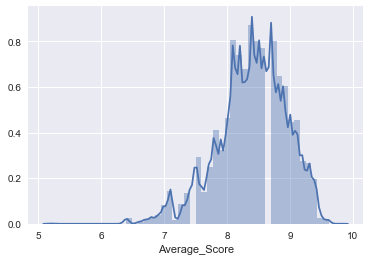

In [17]:
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

sns.distplot(hotel['Average_Score'])


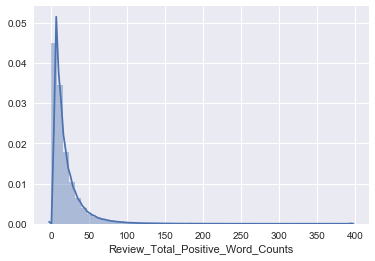

In [18]:
sns.distplot(hotel['Review_Total_Positive_Word_Counts'])

In [19]:
hotel['Review_Total_Positive_Word_Counts'].describe()

count    512470.000000
mean         17.765052
std          21.789025
min           0.000000
25%           5.000000
50%          11.000000
75%          22.000000
max         395.000000
Name: Review_Total_Positive_Word_Counts, dtype: float64

In [20]:
#Countries are taken from the link below
# https://gist.github.com/Desperado/3293395#file-countryinfo-py
countries = [
{'timezones': ['Europe/Andorra'], 'code': 'AD', 'continent': 'Europe', 'name': 'Andorra', 'capital': 'Andorra la Vella'},
{'timezones': ['Asia/Kabul'], 'code': 'AF', 'continent': 'Asia', 'name': 'Afghanistan', 'capital': 'Kabul'},
{'timezones': ['America/Antigua'], 'code': 'AG', 'continent': 'North America', 'name': 'Antigua and Barbuda', 'capital': "St. John's"},
{'timezones': ['Europe/Tirane'], 'code': 'AL', 'continent': 'Europe', 'name': 'Albania', 'capital': 'Tirana'},
{'timezones': ['Asia/Yerevan'], 'code': 'AM', 'continent': 'Asia', 'name': 'Armenia', 'capital': 'Yerevan'},
{'timezones': ['Africa/Luanda'], 'code': 'AO', 'continent': 'Africa', 'name': 'Angola', 'capital': 'Luanda'},
{'timezones': ['America/Argentina/Buenos_Aires', 'America/Argentina/Cordoba', 'America/Argentina/Jujuy', 'America/Argentina/Tucuman', 'America/Argentina/Catamarca', 'America/Argentina/La_Rioja', 'America/Argentina/San_Juan', 'America/Argentina/Mendoza', 'America/Argentina/Rio_Gallegos', 'America/Argentina/Ushuaia'], 'code': 'AR', 'continent': 'South America', 'name': 'Argentina', 'capital': 'Buenos Aires'},
{'timezones': ['Europe/Vienna'], 'code': 'AT', 'continent': 'Europe', 'name': 'Austria', 'capital': 'Vienna'},
{'timezones': ['Australia/Lord_Howe', 'Australia/Hobart', 'Australia/Currie', 'Australia/Melbourne', 'Australia/Sydney', 'Australia/Broken_Hill', 'Australia/Brisbane', 'Australia/Lindeman', 'Australia/Adelaide', 'Australia/Darwin', 'Australia/Perth'], 'code': 'AU', 'continent': 'Oceania', 'name': 'Australia', 'capital': 'Canberra'},
{'timezones': ['Asia/Baku'], 'code': 'AZ', 'continent': 'Asia', 'name': 'Azerbaijan', 'capital': 'Baku'},
{'timezones': ['America/Barbados'], 'code': 'BB', 'continent': 'North America', 'name': 'Barbados', 'capital': 'Bridgetown'},
{'timezones': ['Asia/Dhaka'], 'code': 'BD', 'continent': 'Asia', 'name': 'Bangladesh', 'capital': 'Dhaka'},
{'timezones': ['Europe/Brussels'], 'code': 'BE', 'continent': 'Europe', 'name': 'Belgium', 'capital': 'Brussels'},
{'timezones': ['Africa/Ouagadougou'], 'code': 'BF', 'continent': 'Africa', 'name': 'Burkina Faso', 'capital': 'Ouagadougou'},
{'timezones': ['Europe/Sofia'], 'code': 'BG', 'continent': 'Europe', 'name': 'Bulgaria', 'capital': 'Sofia'},
{'timezones': ['Asia/Bahrain'], 'code': 'BH', 'continent': 'Asia', 'name': 'Bahrain', 'capital': 'Manama'},
{'timezones': ['Africa/Bujumbura'], 'code': 'BI', 'continent': 'Africa', 'name': 'Burundi', 'capital': 'Bujumbura'},
{'timezones': ['Africa/Porto-Novo'], 'code': 'BJ', 'continent': 'Africa', 'name': 'Benin', 'capital': 'Porto-Novo'},
{'timezones': ['Asia/Brunei'], 'code': 'BN', 'continent': 'Asia', 'name': 'Brunei Darussalam', 'capital': 'Bandar Seri Begawan'},
{'timezones': ['America/La_Paz'], 'code': 'BO', 'continent': 'South America', 'name': 'Bolivia', 'capital': 'Sucre'},
{'timezones': ['America/Noronha', 'America/Belem', 'America/Fortaleza', 'America/Recife', 'America/Araguaina', 'America/Maceio', 'America/Bahia', 'America/Sao_Paulo', 'America/Campo_Grande', 'America/Cuiaba', 'America/Porto_Velho', 'America/Boa_Vista', 'America/Manaus', 'America/Eirunepe', 'America/Rio_Branco'], 'code': 'BR', 'continent': 'South America', 'name': 'Brazil', 'capital': 'Bras\xc3\xadlia'},
{'timezones': ['America/Nassau'], 'code': 'BS', 'continent': 'North America', 'name': 'Bahamas', 'capital': 'Nassau'},
{'timezones': ['Asia/Thimphu'], 'code': 'BT', 'continent': 'Asia', 'name': 'Bhutan', 'capital': 'Thimphu'},
{'timezones': ['Africa/Gaborone'], 'code': 'BW', 'continent': 'Africa', 'name': 'Botswana', 'capital': 'Gaborone'},
{'timezones': ['Europe/Minsk'], 'code': 'BY', 'continent': 'Europe', 'name': 'Belarus', 'capital': 'Minsk'},
{'timezones': ['America/Belize'], 'code': 'BZ', 'continent': 'North America', 'name': 'Belize', 'capital': 'Belmopan'},
{'timezones': ['America/St_Johns', 'America/Halifax', 'America/Glace_Bay', 'America/Moncton', 'America/Goose_Bay', 'America/Blanc-Sablon', 'America/Montreal', 'America/Toronto', 'America/Nipigon', 'America/Thunder_Bay', 'America/Pangnirtung', 'America/Iqaluit', 'America/Atikokan', 'America/Rankin_Inlet', 'America/Winnipeg', 'America/Rainy_River', 'America/Cambridge_Bay', 'America/Regina', 'America/Swift_Current', 'America/Edmonton', 'America/Yellowknife', 'America/Inuvik', 'America/Dawson_Creek', 'America/Vancouver', 'America/Whitehorse', 'America/Dawson'], 'code': 'CA', 'continent': 'North America', 'name': 'Canada', 'capital': 'Ottawa'},
{'timezones': ['Africa/Kinshasa', 'Africa/Lubumbashi'], 'code': 'CD', 'continent': 'Africa', 'name': 'Democratic Republic of the Congo', 'capital': 'Kinshasa'},
{'timezones': ['Africa/Brazzaville'], 'code': 'CG', 'continent': 'Africa', 'name': 'Republic of the Congo', 'capital': 'Brazzaville'},
{'timezones': ['Africa/Abidjan'], 'code': 'CI', 'continent': 'Africa', 'name': "C\xc3\xb4te d'Ivoire", 'capital': 'Yamoussoukro'},
{'timezones': ['America/Santiago', 'Pacific/Easter'], 'code': 'CL', 'continent': 'South America', 'name': 'Chile', 'capital': 'Santiago'},
{'timezones': ['Africa/Douala'], 'code': 'CM', 'continent': 'Africa', 'name': 'Cameroon', 'capital': 'Yaound\xc3\xa9'},
{'timezones': ['Asia/Shanghai', 'Asia/Harbin', 'Asia/Chongqing', 'Asia/Urumqi', 'Asia/Kashgar'], 'code': 'CN', 'continent': 'Asia', 'name': "People's Republic of China", 'capital': 'Beijing'},
{'timezones': ['America/Bogota'], 'code': 'CO', 'continent': 'South America', 'name': 'Colombia', 'capital': 'Bogot\xc3\xa1'},
{'timezones': ['America/Costa_Rica'], 'code': 'CR', 'continent': 'North America', 'name': 'Costa Rica', 'capital': 'San Jos\xc3\xa9'},
{'timezones': ['America/Havana'], 'code': 'CU', 'continent': 'North America', 'name': 'Cuba', 'capital': 'Havana'},
{'timezones': ['Atlantic/Cape_Verde'], 'code': 'CV', 'continent': 'Africa', 'name': 'Cape Verde', 'capital': 'Praia'},
{'timezones': ['Asia/Nicosia'], 'code': 'CY', 'continent': 'Asia', 'name': 'Cyprus', 'capital': 'Nicosia'},
{'timezones': ['Europe/Prague'], 'code': 'CZ', 'continent': 'Europe', 'name': 'Czech Republic', 'capital': 'Prague'},
{'timezones': ['Europe/Berlin'], 'code': 'DE', 'continent': 'Europe', 'name': 'Germany', 'capital': 'Berlin'},
{'timezones': ['Africa/Djibouti'], 'code': 'DJ', 'continent': 'Africa', 'name': 'Djibouti', 'capital': 'Djibouti City'},
{'timezones': ['Europe/Copenhagen'], 'code': 'DK', 'continent': 'Europe', 'name': 'Denmark', 'capital': 'Copenhagen'},
{'timezones': ['America/Dominica'], 'code': 'DM', 'continent': 'North America', 'name': 'Dominica', 'capital': 'Roseau'},
{'timezones': ['America/Santo_Domingo'], 'code': 'DO', 'continent': 'North America', 'name': 'Dominican Republic', 'capital': 'Santo Domingo'},
{'timezones': ['America/Guayaquil', 'Pacific/Galapagos'], 'code': 'EC', 'continent': 'South America', 'name': 'Ecuador', 'capital': 'Quito'},
{'timezones': ['Europe/Tallinn'], 'code': 'EE', 'continent': 'Europe', 'name': 'Estonia', 'capital': 'Tallinn'},
{'timezones': ['Africa/Cairo'], 'code': 'EG', 'continent': 'Africa', 'name': 'Egypt', 'capital': 'Cairo'},
{'timezones': ['Africa/Asmera'], 'code': 'ER', 'continent': 'Africa', 'name': 'Eritrea', 'capital': 'Asmara'},
{'timezones': ['Africa/Addis_Ababa'], 'code': 'ET', 'continent': 'Africa', 'name': 'Ethiopia', 'capital': 'Addis Ababa'},
{'timezones': ['Europe/Helsinki'], 'code': 'FI', 'continent': 'Europe', 'name': 'Finland', 'capital': 'Helsinki'},
{'timezones': ['Pacific/Fiji'], 'code': 'FJ', 'continent': 'Oceania', 'name': 'Fiji', 'capital': 'Suva'},
{'timezones': ['Europe/Paris'], 'code': 'FR', 'continent': 'Europe', 'name': 'France', 'capital': 'Paris'},
{'timezones': ['Africa/Libreville'], 'code': 'GA', 'continent': 'Africa', 'name': 'Gabon', 'capital': 'Libreville'},
{'timezones': ['Asia/Tbilisi'], 'code': 'GE', 'continent': 'Asia', 'name': 'Georgia', 'capital': 'Tbilisi'},
{'timezones': ['Africa/Accra'], 'code': 'GH', 'continent': 'Africa', 'name': 'Ghana', 'capital': 'Accra'},
{'timezones': ['Africa/Banjul'], 'code': 'GM', 'continent': 'Africa', 'name': 'The Gambia', 'capital': 'Banjul'},
{'timezones': ['Africa/Conakry'], 'code': 'GN', 'continent': 'Africa', 'name': 'Guinea', 'capital': 'Conakry'},
{'timezones': ['Europe/Athens'], 'code': 'GR', 'continent': 'Europe', 'name': 'Greece', 'capital': 'Athens'},
{'timezones': ['America/Guatemala'], 'code': 'GT', 'continent': 'North America', 'name': 'Guatemala', 'capital': 'Guatemala City'},
{'timezones': ['America/Guatemala'], 'code': 'GT', 'continent': 'North America', 'name': 'Haiti', 'capital': 'Port-au-Prince'},
{'timezones': ['Africa/Bissau'], 'code': 'GW', 'continent': 'Africa', 'name': 'Guinea-Bissau', 'capital': 'Bissau'},
{'timezones': ['America/Guyana'], 'code': 'GY', 'continent': 'South America', 'name': 'Guyana', 'capital': 'Georgetown'},
{'timezones': ['America/Tegucigalpa'], 'code': 'HN', 'continent': 'North America', 'name': 'Honduras', 'capital': 'Tegucigalpa'},
{'timezones': ['Europe/Budapest'], 'code': 'HU', 'continent': 'Europe', 'name': 'Hungary', 'capital': 'Budapest'},
{'timezones': ['Asia/Jakarta', 'Asia/Pontianak', 'Asia/Makassar', 'Asia/Jayapura'], 'code': 'ID', 'continent': 'Asia', 'name': 'Indonesia', 'capital': 'Jakarta'},
{'timezones': ['Europe/Dublin'], 'code': 'IE', 'continent': 'Europe', 'name': 'Republic of Ireland', 'capital': 'Dublin'},
{'timezones': ['Asia/Jerusalem'], 'code': 'IL', 'continent': 'Asia', 'name': 'Israel', 'capital': 'Jerusalem'},
{'timezones': ['Asia/Calcutta'], 'code': 'IN', 'continent': 'Asia', 'name': 'India', 'capital': 'New Delhi'},
{'timezones': ['Asia/Baghdad'], 'code': 'IQ', 'continent': 'Asia', 'name': 'Iraq', 'capital': 'Baghdad'},
{'timezones': ['Asia/Tehran'], 'code': 'IR', 'continent': 'Asia', 'name': 'Iran', 'capital': 'Tehran'},
{'timezones': ['Atlantic/Reykjavik'], 'code': 'IS', 'continent': 'Europe', 'name': 'Iceland', 'capital': 'Reykjav\xc3\xadk'},
{'timezones': ['Europe/Rome'], 'code': 'IT', 'continent': 'Europe', 'name': 'Italy', 'capital': 'Rome'},
{'timezones': ['America/Jamaica'], 'code': 'JM', 'continent': 'North America', 'name': 'Jamaica', 'capital': 'Kingston'},
{'timezones': ['Asia/Amman'], 'code': 'JO', 'continent': 'Asia', 'name': 'Jordan', 'capital': 'Amman'},
{'timezones': ['Asia/Tokyo'], 'code': 'JP', 'continent': 'Asia', 'name': 'Japan', 'capital': 'Tokyo'},
{'timezones': ['Africa/Nairobi'], 'code': 'KE', 'continent': 'Africa', 'name': 'Kenya', 'capital': 'Nairobi'},
{'timezones': ['Asia/Bishkek'], 'code': 'KG', 'continent': 'Asia', 'name': 'Kyrgyzstan', 'capital': 'Bishkek'},
{'timezones': ['Pacific/Tarawa', 'Pacific/Enderbury', 'Pacific/Kiritimati'], 'code': 'KI', 'continent': 'Oceania', 'name': 'Kiribati', 'capital': 'Tarawa'},
{'timezones': ['Asia/Pyongyang'], 'code': 'KP', 'continent': 'Asia', 'name': 'North Korea', 'capital': 'Pyongyang'},
{'timezones': ['Asia/Seoul'], 'code': 'KR', 'continent': 'Asia', 'name': 'South Korea', 'capital': 'Seoul'},
{'timezones': ['Asia/Kuwait'], 'code': 'KW', 'continent': 'Asia', 'name': 'Kuwait', 'capital': 'Kuwait City'},
{'timezones': ['Asia/Beirut'], 'code': 'LB', 'continent': 'Asia', 'name': 'Lebanon', 'capital': 'Beirut'},
{'timezones': ['Europe/Vaduz'], 'code': 'LI', 'continent': 'Europe', 'name': 'Liechtenstein', 'capital': 'Vaduz'},
{'timezones': ['Africa/Monrovia'], 'code': 'LR', 'continent': 'Africa', 'name': 'Liberia', 'capital': 'Monrovia'},
{'timezones': ['Africa/Maseru'], 'code': 'LS', 'continent': 'Africa', 'name': 'Lesotho', 'capital': 'Maseru'},
{'timezones': ['Europe/Vilnius'], 'code': 'LT', 'continent': 'Europe', 'name': 'Lithuania', 'capital': 'Vilnius'},
{'timezones': ['Europe/Luxembourg'], 'code': 'LU', 'continent': 'Europe', 'name': 'Luxembourg', 'capital': 'Luxembourg City'},
{'timezones': ['Europe/Riga'], 'code': 'LV', 'continent': 'Europe', 'name': 'Latvia', 'capital': 'Riga'},
{'timezones': ['Africa/Tripoli'], 'code': 'LY', 'continent': 'Africa', 'name': 'Libya', 'capital': 'Tripoli'},
{'timezones': ['Indian/Antananarivo'], 'code': 'MG', 'continent': 'Africa', 'name': 'Madagascar', 'capital': 'Antananarivo'},
{'timezones': ['Pacific/Majuro', 'Pacific/Kwajalein'], 'code': 'MH', 'continent': 'Oceania', 'name': 'Marshall Islands', 'capital': 'Majuro'},
{'timezones': ['Europe/Skopje'], 'code': 'MK', 'continent': 'Europe', 'name': 'Macedonia', 'capital': 'Skopje'},
{'timezones': ['Africa/Bamako'], 'code': 'ML', 'continent': 'Africa', 'name': 'Mali', 'capital': 'Bamako'},
{'timezones': ['Asia/Rangoon'], 'code': 'MM', 'continent': 'Asia', 'name': 'Myanmar', 'capital': 'Naypyidaw'},
{'timezones': ['Asia/Ulaanbaatar', 'Asia/Hovd', 'Asia/Choibalsan'], 'code': 'MN', 'continent': 'Asia', 'name': 'Mongolia', 'capital': 'Ulaanbaatar'},
{'timezones': ['Africa/Nouakchott'], 'code': 'MR', 'continent': 'Africa', 'name': 'Mauritania', 'capital': 'Nouakchott'},
{'timezones': ['Europe/Malta'], 'code': 'MT', 'continent': 'Europe', 'name': 'Malta', 'capital': 'Valletta'},
{'timezones': ['Indian/Mauritius'], 'code': 'MU', 'continent': 'Africa', 'name': 'Mauritius', 'capital': 'Port Louis'},
{'timezones': ['Indian/Maldives'], 'code': 'MV', 'continent': 'Asia', 'name': 'Maldives', 'capital': 'Mal\xc3\xa9'},
{'timezones': ['Africa/Blantyre'], 'code': 'MW', 'continent': 'Africa', 'name': 'Malawi', 'capital': 'Lilongwe'},
{'timezones': ['America/Mexico_City', 'America/Cancun', 'America/Merida', 'America/Monterrey', 'America/Mazatlan', 'America/Chihuahua', 'America/Hermosillo', 'America/Tijuana'], 'code': 'MX', 'continent': 'North America', 'name': 'Mexico', 'capital': 'Mexico City'},
{'timezones': ['Asia/Kuala_Lumpur', 'Asia/Kuching'], 'code': 'MY', 'continent': 'Asia', 'name': 'Malaysia', 'capital': 'Kuala Lumpur'},
{'timezones': ['Africa/Maputo'], 'code': 'MZ', 'continent': 'Africa', 'name': 'Mozambique', 'capital': 'Maputo'},
{'timezones': ['Africa/Windhoek'], 'code': 'NA', 'continent': 'Africa', 'name': 'Namibia', 'capital': 'Windhoek'},
{'timezones': ['Africa/Niamey'], 'code': 'NE', 'continent': 'Africa', 'name': 'Niger', 'capital': 'Niamey'},
{'timezones': ['Africa/Lagos'], 'code': 'NG', 'continent': 'Africa', 'name': 'Nigeria', 'capital': 'Abuja'},
{'timezones': ['America/Managua'], 'code': 'NI', 'continent': 'North America', 'name': 'Nicaragua', 'capital': 'Managua'},
{'timezones': ['Europe/Amsterdam'], 'code': 'NL', 'continent': 'Europe', 'name': 'Kingdom of the Netherlands', 'capital': 'Amsterdam'},
{'timezones': ['Europe/Oslo'], 'code': 'NO', 'continent': 'Europe', 'name': 'Norway', 'capital': 'Oslo'},
{'timezones': ['Asia/Katmandu'], 'code': 'NP', 'continent': 'Asia', 'name': 'Nepal', 'capital': 'Kathmandu'},
{'timezones': ['Pacific/Nauru'], 'code': 'NR', 'continent': 'Oceania', 'name': 'Nauru', 'capital': 'Yaren'},
{'timezones': ['Pacific/Auckland', 'Pacific/Chatham'], 'code': 'NZ', 'continent': 'Oceania', 'name': 'New Zealand', 'capital': 'Wellington'},
{'timezones': ['Asia/Muscat'], 'code': 'OM', 'continent': 'Asia', 'name': 'Oman', 'capital': 'Muscat'},
{'timezones': ['America/Panama'], 'code': 'PA', 'continent': 'North America', 'name': 'Panama', 'capital': 'Panama City'},
{'timezones': ['America/Lima'], 'code': 'PE', 'continent': 'South America', 'name': 'Peru', 'capital': 'Lima'},
{'timezones': ['Pacific/Port_Moresby'], 'code': 'PG', 'continent': 'Oceania', 'name': 'Papua New Guinea', 'capital': 'Port Moresby'},
{'timezones': ['Asia/Manila'], 'code': 'PH', 'continent': 'Asia', 'name': 'Philippines', 'capital': 'Manila'},
{'timezones': ['Asia/Karachi'], 'code': 'PK', 'continent': 'Asia', 'name': 'Pakistan', 'capital': 'Islamabad'},
{'timezones': ['Europe/Warsaw'], 'code': 'PL', 'continent': 'Europe', 'name': 'Poland', 'capital': 'Warsaw'},
{'timezones': ['Europe/Lisbon', 'Atlantic/Madeira', 'Atlantic/Azores'], 'code': 'PT', 'continent': 'Europe', 'name': 'Portugal', 'capital': 'Lisbon'},
{'timezones': ['Pacific/Palau'], 'code': 'PW', 'continent': 'Oceania', 'name': 'Palau', 'capital': 'Ngerulmud'},
{'timezones': ['America/Asuncion'], 'code': 'PY', 'continent': 'South America', 'name': 'Paraguay', 'capital': 'Asunci\xc3\xb3n'},
{'timezones': ['Asia/Qatar'], 'code': 'QA', 'continent': 'Asia', 'name': 'Qatar', 'capital': 'Doha'},
{'timezones': ['Europe/Bucharest'], 'code': 'RO', 'continent': 'Europe', 'name': 'Romania', 'capital': 'Bucharest'},
{'timezones': ['Europe/Kaliningrad', 'Europe/Moscow', 'Europe/Volgograd', 'Europe/Samara', 'Asia/Yekaterinburg', 'Asia/Omsk', 'Asia/Novosibirsk', 'Asia/Krasnoyarsk', 'Asia/Irkutsk', 'Asia/Yakutsk', 'Asia/Vladivostok', 'Asia/Sakhalin', 'Asia/Magadan', 'Asia/Kamchatka', 'Asia/Anadyr'], 'code': 'RU', 'continent': 'Europe', 'name': 'Russia', 'capital': 'Moscow'},
{'timezones': ['Africa/Kigali'], 'code': 'RW', 'continent': 'Africa', 'name': 'Rwanda', 'capital': 'Kigali'},
{'timezones': ['Asia/Riyadh'], 'code': 'SA', 'continent': 'Asia', 'name': 'Saudi Arabia', 'capital': 'Riyadh'},
{'timezones': ['Pacific/Guadalcanal'], 'code': 'SB', 'continent': 'Oceania', 'name': 'Solomon Islands', 'capital': 'Honiara'},
{'timezones': ['Indian/Mahe'], 'code': 'SC', 'continent': 'Africa', 'name': 'Seychelles', 'capital': 'Victoria'},
{'timezones': ['Africa/Khartoum'], 'code': 'SD', 'continent': 'Africa', 'name': 'Sudan', 'capital': 'Khartoum'},
{'timezones': ['Europe/Stockholm'], 'code': 'SE', 'continent': 'Europe', 'name': 'Sweden', 'capital': 'Stockholm'},
{'timezones': ['Asia/Singapore'], 'code': 'SG', 'continent': 'Asia', 'name': 'Singapore', 'capital': 'Singapore'},
{'timezones': ['Europe/Ljubljana'], 'code': 'SI', 'continent': 'Europe', 'name': 'Slovenia', 'capital': 'Ljubljana'},
{'timezones': ['Europe/Bratislava'], 'code': 'SK', 'continent': 'Europe', 'name': 'Slovakia', 'capital': 'Bratislava'},
{'timezones': ['Africa/Freetown'], 'code': 'SL', 'continent': 'Africa', 'name': 'Sierra Leone', 'capital': 'Freetown'},
{'timezones': ['Europe/San_Marino'], 'code': 'SM', 'continent': 'Europe', 'name': 'San Marino', 'capital': 'San Marino'},
{'timezones': ['Africa/Dakar'], 'code': 'SN', 'continent': 'Africa', 'name': 'Senegal', 'capital': 'Dakar'},
{'timezones': ['Africa/Mogadishu'], 'code': 'SO', 'continent': 'Africa', 'name': 'Somalia', 'capital': 'Mogadishu'},
{'timezones': ['America/Paramaribo'], 'code': 'SR', 'continent': 'South America', 'name': 'Suriname', 'capital': 'Paramaribo'},
{'timezones': ['Africa/Sao_Tome'], 'code': 'ST', 'continent': 'Africa', 'name': 'S\xc3\xa3o Tom\xc3\xa9 and Pr\xc3\xadncipe', 'capital': 'S\xc3\xa3o Tom\xc3\xa9'},
{'timezones': ['Asia/Damascus'], 'code': 'SY', 'continent': 'Asia', 'name': 'Syria', 'capital': 'Damascus'},
{'timezones': ['Africa/Lome'], 'code': 'TG', 'continent': 'Africa', 'name': 'Togo', 'capital': 'Lom\xc3\xa9'},
{'timezones': ['Asia/Bangkok'], 'code': 'TH', 'continent': 'Asia', 'name': 'Thailand', 'capital': 'Bangkok'},
{'timezones': ['Asia/Dushanbe'], 'code': 'TJ', 'continent': 'Asia', 'name': 'Tajikistan', 'capital': 'Dushanbe'},
{'timezones': ['Asia/Ashgabat'], 'code': 'TM', 'continent': 'Asia', 'name': 'Turkmenistan', 'capital': 'Ashgabat'},
{'timezones': ['Africa/Tunis'], 'code': 'TN', 'continent': 'Africa', 'name': 'Tunisia', 'capital': 'Tunis'},
{'timezones': ['Pacific/Tongatapu'], 'code': 'TO', 'continent': 'Oceania', 'name': 'Tonga', 'capital': 'Nuku\xca\xbbalofa'},
{'timezones': ['Europe/Istanbul'], 'code': 'TR', 'continent': 'Asia', 'name': 'Turkey', 'capital': 'Ankara'},
{'timezones': ['America/Port_of_Spain'], 'code': 'TT', 'continent': 'North America', 'name': 'Trinidad and Tobago', 'capital': 'Port of Spain'},
{'timezones': ['Pacific/Funafuti'], 'code': 'TV', 'continent': 'Oceania', 'name': 'Tuvalu', 'capital': 'Funafuti'},
{'timezones': ['Africa/Dar_es_Salaam'], 'code': 'TZ', 'continent': 'Africa', 'name': 'Tanzania', 'capital': 'Dodoma'},
{'timezones': ['Europe/Kiev', 'Europe/Uzhgorod', 'Europe/Zaporozhye', 'Europe/Simferopol'], 'code': 'UA', 'continent': 'Europe', 'name': 'Ukraine', 'capital': 'Kiev'},
{'timezones': ['Africa/Kampala'], 'code': 'UG', 'continent': 'Africa', 'name': 'Uganda', 'capital': 'Kampala'},
{'timezones': ['America/New_York', 'America/Detroit', 'America/Kentucky/Louisville', 'America/Kentucky/Monticello', 'America/Indiana/Indianapolis', 'America/Indiana/Marengo', 'America/Indiana/Knox', 'America/Indiana/Vevay', 'America/Chicago', 'America/Indiana/Vincennes', 'America/Indiana/Petersburg', 'America/Menominee', 'America/North_Dakota/Center', 'America/North_Dakota/New_Salem', 'America/Denver', 'America/Boise', 'America/Shiprock', 'America/Phoenix', 'America/Los_Angeles', 'America/Anchorage', 'America/Juneau', 'America/Yakutat', 'America/Nome', 'America/Adak', 'Pacific/Honolulu'], 'code': 'US', 'continent': 'North America', 'name': 'United States', 'capital': 'Washington, D.C.'},
{'timezones': ['America/Montevideo'], 'code': 'UY', 'continent': 'South America', 'name': 'Uruguay', 'capital': 'Montevideo'},
{'timezones': ['Asia/Samarkand', 'Asia/Tashkent'], 'code': 'UZ', 'continent': 'Asia', 'name': 'Uzbekistan', 'capital': 'Tashkent'},
{'timezones': ['Europe/Vatican'], 'code': 'VA', 'continent': 'Europe', 'name': 'Vatican City', 'capital': 'Vatican City'},
{'timezones': ['America/Caracas'], 'code': 'VE', 'continent': 'South America', 'name': 'Venezuela', 'capital': 'Caracas'},
{'timezones': ['Asia/Saigon'], 'code': 'VN', 'continent': 'Asia', 'name': 'Vietnam', 'capital': 'Hanoi'},
{'timezones': ['Pacific/Efate'], 'code': 'VU', 'continent': 'Oceania', 'name': 'Vanuatu', 'capital': 'Port Vila'},
{'timezones': ['Asia/Aden'], 'code': 'YE', 'continent': 'Asia', 'name': 'Yemen', 'capital': "Sana'a"},
{'timezones': ['Africa/Lusaka'], 'code': 'ZM', 'continent': 'Africa', 'name': 'Zambia', 'capital': 'Lusaka'},
{'timezones': ['Africa/Harare'], 'code': 'ZW', 'continent': 'Africa', 'name': 'Zimbabwe', 'capital': 'Harare'},
{'timezones': ['Africa/Algiers'], 'code': 'DZ', 'continent': 'Africa', 'name': 'Algeria', 'capital': 'Algiers'},
{'timezones': ['Europe/Sarajevo'], 'code': 'BA', 'continent': 'Europe', 'name': 'Bosnia and Herzegovina', 'capital': 'Sarajevo'},
{'timezones': ['Asia/Phnom_Penh'], 'code': 'KH', 'continent': 'Asia', 'name': 'Cambodia', 'capital': 'Phnom Penh'},
{'timezones': ['Africa/Bangui'], 'code': 'CF', 'continent': 'Africa', 'name': 'Central African Republic', 'capital': 'Bangui'},
{'timezones': ['Africa/Ndjamena'], 'code': 'TD', 'continent': 'Africa', 'name': 'Chad', 'capital': "N'Djamena"},
{'timezones': ['Indian/Comoro'], 'code': 'KM', 'continent': 'Africa', 'name': 'Comoros', 'capital': 'Moroni'},
{'timezones': ['Europe/Zagreb'], 'code': 'HR', 'continent': 'Europe', 'name': 'Croatia', 'capital': 'Zagreb'},
{'timezones': ['Asia/Dili'], 'code': 'TL', 'continent': 'Asia', 'name': 'East Timor', 'capital': 'Dili'},
{'timezones': ['America/El_Salvador'], 'code': 'SV', 'continent': 'North America', 'name': 'El Salvador', 'capital': 'San Salvador'},
{'timezones': ['Africa/Malabo'], 'code': 'GQ', 'continent': 'Africa', 'name': 'Equatorial Guinea', 'capital': 'Malabo'},
{'timezones': ['America/Grenada'], 'code': 'GD', 'continent': 'North America', 'name': 'Grenada', 'capital': "St. George's"},
{'timezones': ['Asia/Almaty', 'Asia/Qyzylorda', 'Asia/Aqtobe', 'Asia/Aqtau', 'Asia/Oral'], 'code': 'KZ', 'continent': 'Asia', 'name': 'Kazakhstan', 'capital': 'Astana'},
{'timezones': ['Asia/Vientiane'], 'code': 'LA', 'continent': 'Asia', 'name': 'Laos', 'capital': 'Vientiane'},
{'timezones': ['Pacific/Truk', 'Pacific/Ponape', 'Pacific/Kosrae'], 'code': 'FM', 'continent': 'Oceania', 'name': 'Federated States of Micronesia', 'capital': 'Palikir'},
{'timezones': ['Europe/Chisinau'], 'code': 'MD', 'continent': 'Europe', 'name': 'Moldova', 'capital': 'Chi\xc5\x9fin\xc4\x83u'},
{'timezones': ['Europe/Monaco'], 'code': 'MC', 'continent': 'Europe', 'name': 'Monaco', 'capital': 'Monaco'},
{'timezones': ['Europe/Podgorica'], 'code': 'ME', 'continent': 'Europe', 'name': 'Montenegro', 'capital': 'Podgorica'},
{'timezones': ['Africa/Casablanca'], 'code': 'MA', 'continent': 'Africa', 'name': 'Morocco', 'capital': 'Rabat'},
{'timezones': ['America/St_Kitts'], 'code': 'KN', 'continent': 'North America', 'name': 'Saint Kitts and Nevis', 'capital': 'Basseterre'},
{'timezones': ['America/St_Lucia'], 'code': 'LC', 'continent': 'North America', 'name': 'Saint Lucia', 'capital': 'Castries'},
{'timezones': ['America/St_Vincent'], 'code': 'VC', 'continent': 'North America', 'name': 'Saint Vincent and the Grenadines', 'capital': 'Kingstown'},
{'timezones': ['Pacific/Apia'], 'code': 'WS', 'continent': 'Oceania', 'name': 'Samoa', 'capital': 'Apia'},
{'timezones': ['Europe/Belgrade'], 'code': 'RS', 'continent': 'Europe', 'name': 'Serbia', 'capital': 'Belgrade'},
{'timezones': ['Africa/Johannesburg'], 'code': 'ZA', 'continent': 'Africa', 'name': 'South Africa', 'capital': 'Pretoria'},
{'timezones': ['Europe/Madrid', 'Africa/Ceuta', 'Atlantic/Canary'], 'code': 'ES', 'continent': 'Europe', 'name': 'Spain', 'capital': 'Madrid'},
{'timezones': ['Asia/Colombo'], 'code': 'LK', 'continent': 'Asia', 'name': 'Sri Lanka', 'capital': 'Sri Jayewardenepura Kotte'},
{'timezones': ['Africa/Mbabane'], 'code': 'SZ', 'continent': 'Africa', 'name': 'Swaziland', 'capital': 'Mbabane'},
{'timezones': ['Europe/Zurich'], 'code': 'CH', 'continent': 'Europe', 'name': 'Switzerland', 'capital': 'Bern'},
{'timezones': ['Asia/Dubai'], 'code': 'AE', 'continent': 'Asia', 'name': 'United Arab Emirates', 'capital': 'Abu Dhabi'},
{'timezones': ['Europe/London'], 'code': 'GB', 'continent': 'Europe', 'name': 'United Kingdom', 'capital': 'London'},
]

In [21]:
europe_list = []
for j in range(len(countries)):
    if countries[j]['continent'] == 'Europe':
        europe_list.append(countries[j]['name'])

asia_list = []
for j in range(len(countries)):
    if countries[j]['continent'] == 'Asia':
        asia_list.append(countries[j]['name'])

northamerica_list = []
for j in range(len(countries)):
    if countries[j]['continent'] == 'North America':
        northamerica_list.append(countries[j]['name'])

southamerica_list = []
for j in range(len(countries)):
    if countries[j]['continent'] == 'South America':
        southamerica_list.append(countries[j]['name'])
        
oceania_list = []
for j in range(len(countries)):
    if countries[j]['continent'] == 'Oceania':
        oceania_list.append(countries[j]['name'])

africa_list = []
for j in range(len(countries)):
    if countries[j]['continent'] == 'Africa':
        africa_list.append(countries[j]['name'])

In [22]:
# There are empty chracters in the beginnig and in the end of Reviewer_Nationality
hotel['Reviewer_Nationality'] = hotel['Reviewer_Nationality'].map(lambda x: x[1:-1])

In [23]:
#Adding continent column to data
continent = []
for k in range(len(hotel)):
    if hotel['Reviewer_Nationality'][k] in europe_list:
        continent.append("Europe")
    elif hotel['Reviewer_Nationality'][k] in asia_list:
        continent.append("Asia")
    elif hotel['Reviewer_Nationality'][k] in africa_list:
        continent.append("Africa")
    elif hotel['Reviewer_Nationality'][k] in oceania_list:
        continent.append("Oceania")
    elif hotel['Reviewer_Nationality'][k] in northamerica_list:
        continent.append("North America")
    elif hotel['Reviewer_Nationality'][k] in southamerica_list:
        continent.append("South America")
    else:
        continent.append("Other")

continent = pd.Series(continent)
hotel['continent'] = continent

#### Look at boxplot of where the guest come from plotted against the average score.  From what we can see from the median values is that we don't have much variation from continent to continent.

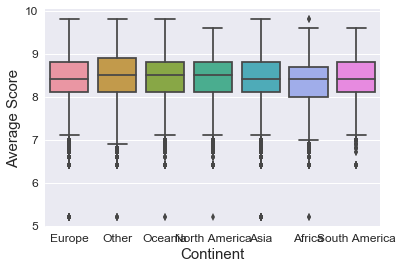

In [24]:
ax = sns.boxplot(x="continent", y="Average_Score", data=hotel)
ax.set_xlabel("Continent",fontsize=15) # Set options for font size for the axis
ax.set_ylabel("Average Score",fontsize=15)
ax.tick_params(labelsize=12)

In [25]:
# Look at medians for Continents and Average Scores
hotel.groupby(['continent'])[['Average_Score']].median()

Average_Score
continent                   
Africa                   8.4
Asia                     8.4
Europe                   8.4
North America            8.5
Oceania                  8.5
Other                    8.5
South America            8.4

#### Let's look at hotel location spatially using latitude and longitude with the package Folium

In [29]:
import folium
from folium import plugins
# bring in data for our map from our data set
locations = hotel[['Hotel_Name','lat','lng']]
grp_locations = locations.groupby(['Hotel_Name']).median() # we use median to bring in single values for lat/long
grp_locations.head()

lat        lng
Hotel_Name                                              
11 Cadogan Gardens                  51.493616  -0.159235
1K Hotel                            48.863932   2.365874
25hours Hotel beim MuseumsQuartier  48.206474  16.354630
41                                  51.498147  -0.143649
45 Park Lane Dorchester Collection  51.506371  -0.151536

#### It would appear that most of the hotels are located in the metropolitan areas of Paris, London, Barcelona, Milan, Vienna and Amsterdam.

##### The below map has the ability to zoom in on the above metropolitan areas.

In [30]:
# set variable to set a map of Europe
latlong = grp_locations.values.tolist() #create variable for latitude and longitude of hotels
euro_coor = (48.5426, 15.255) #This sets the intial zoom of the map
maparea = folium.Map(location=euro_coor, zoom_start=5)
# Add markers of hotels into the map
marker_cluster = folium.MarkerCluster().add_to(maparea)
for point in range(0, len(latlong)):
    folium.Marker(latlong[point]).add_to(marker_cluster) #This will create clusters to show density at a high level
maparea

### Attribute relationships
The exploration of relationships between variables can provide insight as well as answer preliminary questions of interest. For example, the following visualizations will address the questions:
1. Is there a relationship between the number of total reviews and the average hotel score?
2. Is there a relationship between the frequency a reviewer reviews and their current score?
3. Is there a relationship between the total number of negative-review words and the score given by an individual? For positive-review word count and score?
4. Does the number of additional scores included in the average without a review have a relationship with the average hotel score?

In [31]:
#Create a new dataframe with only the attributes that have unique values based on hotel regardless of reviewer.
uniquehotel= hotel.drop_duplicates(['Hotel_Name'], inplace=False)

#Print the head of the new dataframe to confirm that the first unique entry for every hotel name was printed
uniquehotel.head()

Hotel_Address  \
0      s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
405   1 15 Templeton Place Earl s Court Kensington a...   
971   1 2 Serjeant s Inn Fleet Street City of London...   
2008  1 3 Queens Garden Westminster Borough London W...   
3778    1 3 Rue d Argentine 16th arr 75116 Paris France   

      Additional_Number_of_Scoring Review_Date  Average_Score  \
0                              194  2017-08-03            7.7   
405                            244  2017-08-03            8.5   
971                            639  2017-08-02            9.2   
2008                          1058  2017-08-02            7.7   
3778                            26  2017-06-29            8.4   

                            Hotel_Name Reviewer_Nationality  \
0                          Hotel Arena               Russia   
405                   K K Hotel George              Ireland   
971            Apex Temple Court Hotel       United Kingdom   
2008  The Park Grand London Paddington               Cyprus   
3778               Monhotel Lounge SPA               Brazil   

                                        Negative_Review  \
0      I am so angry that i made this post available...   
405     Really nothing negative to say about this hotel   
971    Difficult to locate the phone to contact rece...   
2008   The first night we were given an extremely sm...   
3778                                        No Negative   

      Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                   397                     1403   
405                                   9                     1831   
971                                  20                     2619   
2008                                 30                     4380   
3778                                  0                      171   

                                        Positive_Review  \
0      Only the park outside of the hotel was beauti...   
405    Very comfortable beds smart bathroom good sho...   
971    They have followed through special requests C...   
2008                               The size of the room   
3778   Nice hotel Room was beautiful and bed very co...   

      Review_Total_Positive_Word_Counts  \
0                                    11   
405                                  18   
971                                  17   
2008                                  6   
3778                                231   

      Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                              7             2.9   
405                                            2             9.6   
971                                            1             9.2   
2008                                           6             8.3   
3778                                           1             9.2   

                                                   Tags days_since_review  \
0     [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
405   [' Leisure trip ', ' Group ', ' Classic Twin R...            0 days   
971   [' Leisure trip ', ' Couple ', ' Deluxe King R...            1 days   
2008  [' Family with young children ', ' Triple Room...            1 days   
3778  [' Leisure trip ', ' Group ', ' Comfort Double...           35 days   

            lat       lng      continent  
0     52.360576  4.915968         Europe  
405   51.491888 -0.194971          Other  
971   51.513734 -0.108751         Europe  
2008  51.514218 -0.180903           Asia  
3778  48.874348  2.289733  South America

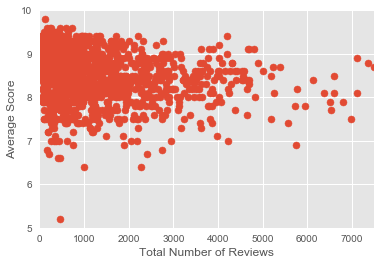

In [32]:
#Create scatter plot of total number of reviews for each hotel v. the average score for each hotel
plt.style.use('ggplot')

x= uniquehotel.Total_Number_of_Reviews
y= uniquehotel.Average_Score

plt.scatter(x,y)
plt.axis([0,7500,5,10])

plt.xlabel('Total Number of Reviews')
plt.ylabel('Average Score')

####  Average score v. Total Number of Reviews
The x-axis was condensed to exclude the few points that had over 7,500 reviews in order to give a better perspective of the highly clustered points with 0-3000 total reviews and an average score between 7-10. Also, the y-axis was condensed to exclude average scores 0-4.9 because there were no hotels with a total average score below 5. This did not satisfactorily resolve the overlapping points. However, since no hotels had a total average score below 5, there is not obvious correlation between the total number of reviews per hotel and the average score per hotel. This scatter plot does reveal that the majority of hotels have received a total number of reviews ranging from 0-2000, and this does not necessarily an indicator of the average score rating of a hotel. If there is any slight trend it may be that as the total number of reviews increase the average rating goes down. However, a more telling visualization is needed to understand the density of overlapping points.

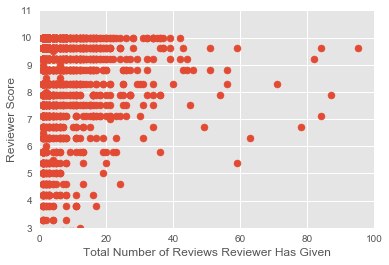

In [34]:
#Create scatter plot of Total_Number_of_Reviews_Reviewer_Has_Given v. Reviewer_Score
plt.style.use('ggplot')

x2= uniquehotel.Total_Number_of_Reviews_Reviewer_Has_Given
y2= uniquehotel.Reviewer_Score

plt.scatter(x2,y2)
plt.axis([0,100,3,11])
plt.xlabel('Total Number of Reviews Reviewer Has Given')
plt.ylabel('Reviewer Score')

#### Reviewer Score v. Total Number of Reviews Reviewer Has Given
There is a positive relationship between the total number of reviews a reviewer has given and their recorded most recent score. It appears that with the increasing number of reviews a reviewer has given the more likely they most recently left a positive score. From a business perspective, it wouldn't be a stretch to conclude that this graph emphasizes te importance of first impressions. For a guest at a hotel who may not usually give reviews, a particularly bad experience may be just enough to push a guest to write a first review. On the other hand, guests who have a tendancy to write reviews frequently may be more likely to give higher reviews. 

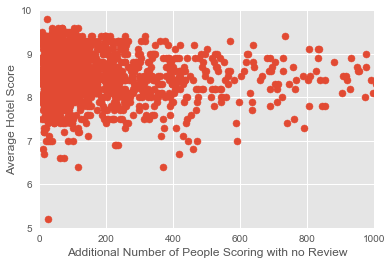

In [35]:
# Create a scatter plot of the Average_Score v. Additional_Number_of_Scoring
plt.style.use('ggplot')

x3= uniquehotel.Additional_Number_of_Scoring
y3= uniquehotel.Average_Score

plt.scatter(x3,y3)
plt.axis([0,1000, 5,10])

plt.xlabel('Additional Number of People Scoring with no Review')
plt.ylabel('Average Hotel Score')

#### Average Hotel Score v. Additional Number of People Scoring with no Review
This scatter plot shows a similar relationship between average hotel score and the number of people that gave a rating and no review as the plot that demonstrates the relationship between the average hotel score and the total number of reviews. The x-axis and y-axis ranges were shortened to accomodate the clustered majority of points. Still, there is no clear positive nor negative relationship between the average hotel score and the number of individuals who rated each hotel without writing a review. It is important to make distinctions between individuals who tend to give ratings with no review and those who give a written opinion. From a business perspective, it would be reasonable to ask, are these two different types of guests altogether? This early indication suggests that there is no distinction in the tendencies of individuals who give ratings with no review.

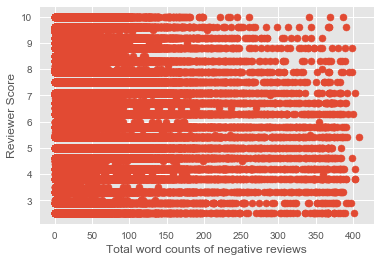

In [36]:
#Create scatter plot Reviewer_Score v. Review_Total_Negative_Word_Counts
plt.style.use('ggplot')

x4=hotel.Review_Total_Negative_Word_Counts
y4=hotel.Reviewer_Score

plt.scatter(x4,y4, marker='.', alpha=0.25)

plt.xlabel('Total word counts of negative reviews')
plt.ylabel('Reviewer Score')

In [ ]:
#Creae scatter plot Reviewer_Score v. Review_Total_Positive_Word_Counts
plt.style.use('ggplot')

x5=hotel.Review_Total_Positive_Word_Counts
y5=hotel.Reviewer_Score

plt.scatter(x5,y5, marker='.', alpha=0.25)

plt.xlabel('Total word counts of positive reviews')
plt.ylabel('Reviewer Score')

#### Reviewer Score v. Total word counts of negative (and positive) reviews
For both graphs, markers were made a smaller size and given transparency in order to accommodate the density of the scatter plots. Both graphs show a potential problem: the 'negative reviews' still have a high density of scores above 5. While less pronounced, the 'positive reviews' have correlating scores below 5. This begs the questions, how were the reviews categorized as 'positive' and 'negative'? Furthermore, if a review is 'negative' in nature, but has a correlating score above average (say, 6+) is it really a negative review?

Besides, the potential problem of reviews being mis-categorized, the graphs can still be assessed for trends. The total number of words per negative review does not show an obvious correlation to the reviewer score. It only appears that the majority of reviewers left reviews that were 150 words or less. The relationship between total word count of positive reviews and reviewer score is more obvious. There is a positive relationship between the variables. In general, it appears that as the number of words in a review increased the reviewer score increased as well.

From a business perspective, these preliminary graphs suggest that positive reviewers with a lot to say may have a tendency to give a higher score. On the other hand, negative reviewers with a lot to say may not have a greater tendency to give an even lower score. More importantly, to understand the rating trends of 'positive' and 'negative' reviewers, the categorization of reviews first needs to be delineated. 

### Attributes for predictive model

### New features

##### The first new feature we will add will be a percentage of positive to negative words in a review for each hotel. As the project matures, this list may grow.

In [37]:
word_ratio = hotel.groupby(by='Hotel_Name')
#create variable to show number of positive words divided by the number of positive and negative words
positive_word_ratio = word_ratio.Review_Total_Positive_Word_Counts.sum()/(word_ratio.Review_Total_Positive_Word_Counts.sum()+word_ratio.Review_Total_Negative_Word_Counts.sum())
print(positive_word_ratio.head())

Hotel_Name
11 Cadogan Gardens                    0.562622
1K Hotel                              0.384897
25hours Hotel beim MuseumsQuartier    0.575518
41                                    0.740131
45 Park Lane Dorchester Collection    0.630859
dtype: float64


##### From the historgram we can see that distribution of Positive Word Ratio appears to be normally distributed.

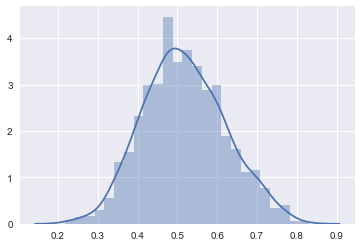

In [38]:
sns.set(color_codes=True)
%matplotlib inline

sns.distplot(positive_word_ratio) #histogram of Positive Word Ratio

In [42]:
# Assign variable to the data frame
hotel['Pos_Word_Ratio'] = hotel['Review_Total_Positive_Word_Counts']/(hotel['Review_Total_Positive_Word_Counts']+hotel['Review_Total_Negative_Word_Counts'])
hotel.head() #check to see if new variable has been added.

Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194  2017-08-03            7.7  Hotel Arena   
1                           194  2017-08-03            7.7  Hotel Arena   
2                           194  2017-07-31            7.7  Hotel Arena   
3                           194  2017-07-31            7.7  Hotel Arena   
4                           194  2017-07-24            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0               Russia   I am so angry that i made this post available...   
1              Ireland                                        No Negative   
2            Australia   Rooms are nice but for elderly a bit difficul...   
3       United Kingdom   My room was dirty and I was afraid to walk ba...   
4          New Zealand   You When I booked with your company on line y...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   
3                                210                     1403   
4                                140                     1403   

                                     Positive_Review    ...      \
0   Only the park outside of the hotel was beauti...    ...       
1   No real complaints the hotel was great great ...    ...       
2   Location was good and staff were ok It is cut...    ...       
3   Great location in nice surroundings the bar a...    ...       
4    Amazing location and building Romantic setting     ...       

   Reviewer_Score                                               Tags  \
0             2.9  [' Leisure trip ', ' Couple ', ' Duplex Double...   
1             7.5  [' Leisure trip ', ' Couple ', ' Duplex Double...   
2             7.1  [' Leisure trip ', ' Family with young childre...   
3             3.8  [' Leisure trip ', ' Solo traveler ', ' Duplex...   
4             6.7  [' Leisure trip ', ' Couple ', ' Suite ', ' St...   

   days_since_review        lat       lng  continent  Pos_Word_Ratio Leisure  \
0             0 days  52.360576  4.915968     Europe        0.026961       1   
1             0 days  52.360576  4.915968      Other        1.000000       1   
2             3 days  52.360576  4.915968    Oceania        0.333333       1   
3             3 days  52.360576  4.915968     Europe        0.110169       1   
4            10 days  52.360576  4.915968    Oceania        0.054054       1   

   Business  Trip_type  
0         0          1  
1         0          1  
2         0          1  
3         0          1  
4         0          1  

[5 rows x 22 columns]

#### Create classification variable for Business and Leisure trips

In [40]:
#Extract information from the Tags
# with help from https://www.kaggle.com/mbkinaci/detailed-eda-and-xgboost-89-accuracy

hotel['Leisure'] = hotel['Tags'].map(lambda x: 1 if ' Leisure trip ' in x else 0)
hotel['Business'] = hotel['Tags'].map(lambda x: 2 if ' Business trip ' in x else 0)
hotel['Trip_type'] = hotel['Leisure'] + hotel['Business']

In [41]:
hotel.head() #check to see if new variables have been added

Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194  2017-08-03            7.7  Hotel Arena   
1                           194  2017-08-03            7.7  Hotel Arena   
2                           194  2017-07-31            7.7  Hotel Arena   
3                           194  2017-07-31            7.7  Hotel Arena   
4                           194  2017-07-24            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0               Russia   I am so angry that i made this post available...   
1              Ireland                                        No Negative   
2            Australia   Rooms are nice but for elderly a bit difficul...   
3       United Kingdom   My room was dirty and I was afraid to walk ba...   
4          New Zealand   You When I booked with your company on line y...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   
3                                210                     1403   
4                                140                     1403   

                                     Positive_Review    ...      \
0   Only the park outside of the hotel was beauti...    ...       
1   No real complaints the hotel was great great ...    ...       
2   Location was good and staff were ok It is cut...    ...       
3   Great location in nice surroundings the bar a...    ...       
4    Amazing location and building Romantic setting     ...       

   Reviewer_Score                                               Tags  \
0             2.9  [' Leisure trip ', ' Couple ', ' Duplex Double...   
1             7.5  [' Leisure trip ', ' Couple ', ' Duplex Double...   
2             7.1  [' Leisure trip ', ' Family with young childre...   
3             3.8  [' Leisure trip ', ' Solo traveler ', ' Duplex...   
4             6.7  [' Leisure trip ', ' Couple ', ' Suite ', ' St...   

   days_since_review        lat       lng  continent  Pos_Word_Ratio Leisure  \
0             0 days  52.360576  4.915968     Europe        0.026961       1   
1             0 days  52.360576  4.915968      Other        1.000000       1   
2             3 days  52.360576  4.915968    Oceania        0.333333       1   
3             3 days  52.360576  4.915968     Europe        0.110169       1   
4            10 days  52.360576  4.915968    Oceania        0.054054       1   

   Business  Trip_type  
0         0          1  
1         0          1  
2         0          1  
3         0          1  
4         0          1  

[5 rows x 22 columns]

### Extra analysis

### Review Word Count

For the following analysis we wanted to take a look at both negative and positive reviews and look for the most words used on each (negative and positive) review. This will help us look for trends and maybe correlations between what are the things the reviewers are writing about and their experience with each hotel.

In [5]:
#Negative Review List
n_word_count = {}

for item in range(len(hotel.Negative_Review)):
    review_list = hotel.Negative_Review[item].upper().split()
    
    for word in review_list:
        if word in n_word_count:
            n_word_count[word] += 1
        else:
            n_word_count[word] = 1
            
#Positive Review List
p_word_count = {}

for item in range(len(hotel.Positive_Review)):
    p_review_list = hotel.Positive_Review[item].upper().split()
    
    for word in p_review_list:
        if word in p_word_count:
            p_word_count[word] += 1
        else:
            p_word_count[word] = 1
            
#Loading stop word list from file.
file = open('stopwords.txt', 'r') # please make sure to include the location of the stopwords file.
stopword_list = file.read().split()
stop_words = [item.upper() for item in stopword_list]

#cleanup

# Will create a new dictionary with the words removed in case we need to investigate further.
n_words_removed = {}
n_words_count = {} # please notice the new dictionary is wordS not word
for k, v in n_word_count.items():
    if k in stop_words or len(k)<3:
        n_words_removed[k] = v
    else:
        n_words_count[k] = v
        
#Positive Review
p_words_removed = {}
p_words_count = {}
for k,v in p_word_count.items():
    if k in stop_words or len(k)<3:
        p_words_removed[k] = v
    else:
        p_words_count[k] = v

#creating dataframe of words and their count
negative_wordcount = pd.DataFrame(list(n_words_count.items()), columns=['Word', 'Count'])
positive_wordcount = pd.DataFrame(list(p_words_count.items()), columns=['Word', 'Count'])

#sorting values in descending order
negative_wordcount_df = negative_wordcount.sort_values(['Count'], ascending = False)
positive_wordcount_df = positive_wordcount.sort_values(['Count'], ascending = False)

### Top 10 Words used on Negative Reviews

In [6]:
negative_wordcount_df.head(10)

Word   Count
20        ROOM  176026
122   NEGATIVE  129447
15       HOTEL   74709
298  BREAKFAST   58478
19       SMALL   49880
156      STAFF   39512
123      ROOMS   34802
169        BED   29828
126        BIT   27546
319   BATHROOM   26585

### Top 10 Words used on Positive Reviews

In [7]:
positive_wordcount_df.head(10)

Word   Count
14       STAFF  194574
7     LOCATION  192856
73        ROOM  140746
2        HOTEL  125326
50        GOOD  112321
6        GREAT  105641
79    FRIENDLY   85353
52   BREAKFAST   84581
178    HELPFUL   76183
54        NICE   69449

### Word Clouds 


To illustrate the frequency of words and provide more information on the customer's experience, we created the the below word clouds for positive and negative reviews.

In [2]:
# loading packages 
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

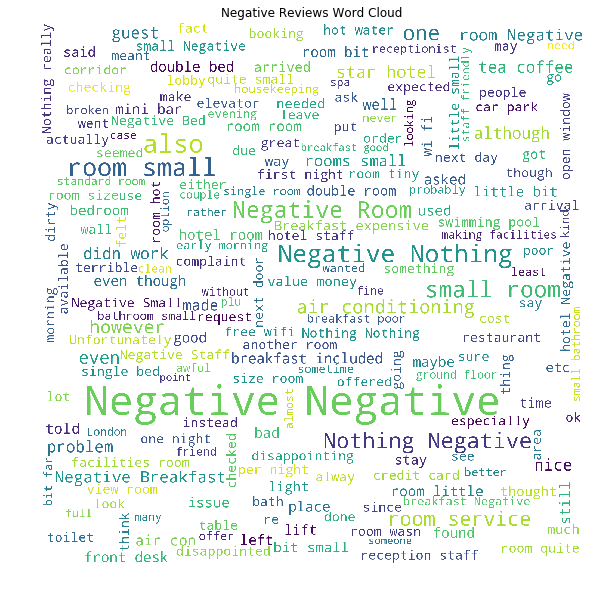

In [3]:
# read in the text file
text = open('Negative_Review.txt', 'r')
negrev=text.read()

plt.figure(figsize=(20,10))
wordcloud= WordCloud(background_color="white",
                    mode="RGB",
                    width=2000,
                    height=2000).generate(negrev)
plt.title("Negative Reviews Word Cloud")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Looking further into the negative reviews, we noticed that many entries were false negatives, ie "Nothing negative" being registered as a negative review when it is actually positive. The false negative reviews were removed and the word cloud was reran. 

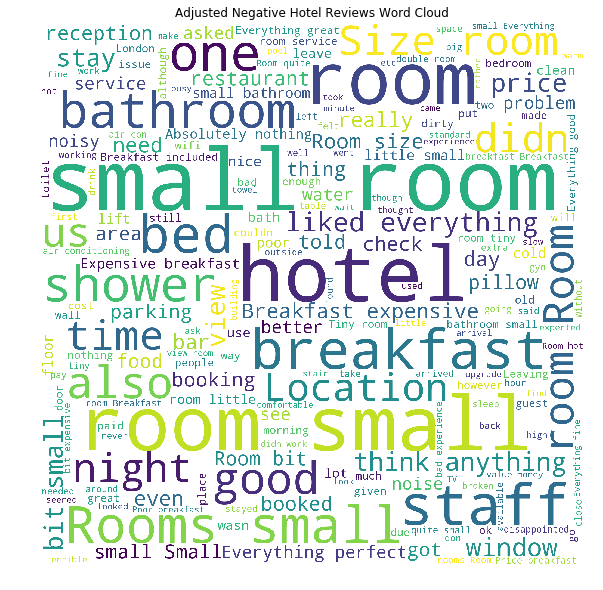

In [4]:
# read in the text file
text = open('Negative_Review2.txt', 'r')
negrev2=text.read()

# Create word cloud
%matplotlib inline
plt.figure(figsize=(20,10))
wordcloud= WordCloud(background_color="white",
                    mode="RGB",
                    width=2000,
                    height=2000).generate(negrev2)
plt.title("Adjusted Negative Hotel Reviews Word Cloud")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Now we can see that customers in fact had the most complaints regarding room size. 

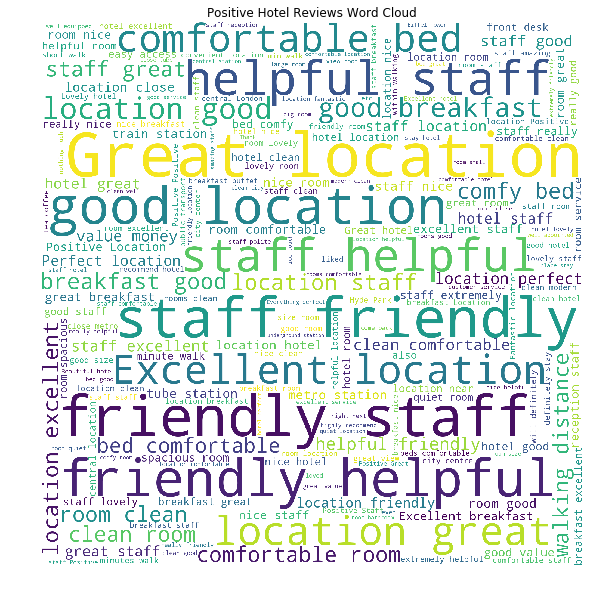

In [5]:
# read in the text file
text = open('Positive_Review.txt', 'r')
posrev=text.read()

plt.figure(figsize=(20,10))
wordcloud= WordCloud(background_color="white",
                    mode="RGB",
                    width=2000,
                    height=2000).generate(posrev)
plt.title("Positive Hotel Reviews Word Cloud")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

The word cloud for positive reviews illustrates that customers provided the most reviews regarding the friendliness of the staff with some references to the location of the hotel. 

### Top 10 Most Popular Tags

In [8]:
#Tags
#Getting a list of each tag
import re
tag_list = []
raw_tags = []
for item in range(len(hotel.Tags)):
    tags = hotel.Tags[item].upper()
          
    tags_list = re.findall(r"'(.*?)'",tags)
    for x in tags_list:
        raw_tags.append(x)
        if x not in tag_list:
            tag_list.append(x)
#print('Total number of tags:', len(tag_list))
# This was = to 2421. Too many tags, lets see what are the most popular.
tag_count = {}

for tag in raw_tags:
    if tag in tag_count:
        tag_count[tag] += 1
    else:
        tag_count[tag] = 1
        
tag_wordcount = pd.DataFrame(list(tag_count.items()), columns=['Word', 'Count'])
tag_wordcount_df = tag_wordcount.sort_values(['Count'], ascending = False)
tag_wordcount_df.head(10)

Word   Count
0                      LEISURE TRIP   417778
7    SUBMITTED FROM A MOBILE DEVICE   307640
1                            COUPLE   252294
12                   STAYED 1 NIGHT   193645
10                  STAYED 2 NIGHTS   133937
8                     SOLO TRAVELER   108545
6                   STAYED 3 NIGHTS    95821
17                    BUSINESS TRIP    82939
11                            GROUP    65392
5        FAMILY WITH YOUNG CHILDREN    61015

#### Tag Order

There seems to be an order in which the tags were used.
For example:
Tag 1 or the tag on the first, position. Looks to be associated with the type of trip (leisure or business for example)
Tag 2 appears is equal to the type of traveler like couple, group, solo traveler, etc.
Tag 3 Type of room
Tag 4 Length of stay
Tag 5 If the review was submitted by a mobile device.

We will create a list of tags based on their order to analyze this further.


In [10]:
# Are tags ordered by type?
tags_listoflists = []
for items in range(len(hotel.Tags)):
    row = re.findall(r"'(.*?)'",hotel.Tags[items].upper())
    tags_listoflists.append(row)

#Quick look at the some of the tags in order
print("Tags total:",len(tags_listoflists))
for i in range(10):
    print(tags_listoflists[i])

Tags total: 515738
[' LEISURE TRIP ', ' COUPLE ', ' DUPLEX DOUBLE ROOM ', ' STAYED 6 NIGHTS ']
[' LEISURE TRIP ', ' COUPLE ', ' DUPLEX DOUBLE ROOM ', ' STAYED 4 NIGHTS ']
[' LEISURE TRIP ', ' FAMILY WITH YOUNG CHILDREN ', ' DUPLEX DOUBLE ROOM ', ' STAYED 3 NIGHTS ', ' SUBMITTED FROM A MOBILE DEVICE ']
[' LEISURE TRIP ', ' SOLO TRAVELER ', ' DUPLEX DOUBLE ROOM ', ' STAYED 3 NIGHTS ']
[' LEISURE TRIP ', ' COUPLE ', ' SUITE ', ' STAYED 2 NIGHTS ', ' SUBMITTED FROM A MOBILE DEVICE ']
[' LEISURE TRIP ', ' GROUP ', ' DUPLEX DOUBLE ROOM ', ' STAYED 1 NIGHT ']
[' LEISURE TRIP ', ' GROUP ', ' DUPLEX TWIN ROOM ', ' STAYED 5 NIGHTS ', ' SUBMITTED FROM A MOBILE DEVICE ']
[' LEISURE TRIP ', ' COUPLE ', ' DUPLEX DOUBLE ROOM ', ' STAYED 2 NIGHTS ', ' SUBMITTED FROM A MOBILE DEVICE ']
[' LEISURE TRIP ', ' COUPLE ', ' DUPLEX DOUBLE ROOM ', ' STAYED 1 NIGHT ', ' SUBMITTED FROM A MOBILE DEVICE ']
[' LEISURE TRIP ', ' COUPLE ', ' LARGE KING ROOM ', ' STAYED 7 NIGHTS ']


In [11]:
#First let's get each tag on its own list.
tag1 = []
tag2 = []
tag3 = []
tag4 = []
tag5 = []
tag6 = []
for alltags in tags_listoflists:
    tag1.append(alltags[0])
    if len(alltags)>1:
        tag2.append(alltags[1])
        if len(alltags)>2:
            tag3.append(alltags[2])
            if len(alltags)>3:
                tag4.append(alltags[3])
                if len(alltags)>4:
                    tag5.append(alltags[4])
                    if len(alltags)>5:
                        tag6.append(alltags[5])
                        if len(alltags)>6:
                            print('Madness!!! Tag length:', len(alltags))

#Then we'll create a function to return Tag and count of occurrences in dataframe form.

def tag_count(a_list):
    tag_count = {}

    for tag in a_list:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
                
    tag_dataframe = pd.DataFrame(list(tag_count.items()), columns=['Word', 'Count'])
    tag_dataframe = tag_dataframe.sort_values(['Count'], ascending = False)
    
    return tag_dataframe



### Most Popular Tags by Position

In [13]:
tag1_df = tag_count(tag1)
tag2_df = tag_count(tag2)
tag3_df = tag_count(tag3)
tag4_df = tag_count(tag4)
tag5_df = tag_count(tag5)
tag6_df = tag_count(tag6)

print('\n Tag 1: \n',tag1_df.head(10))
print('\n Tag 2: \n',tag2_df.head(10))
print('\n Tag 3: \n',tag3_df.head(10))
print('\n Tag 4: \n',tag4_df.head(10))
print('\n Tag 5: \n',tag5_df.head(10))
print('\n Tag 6: \n',tag6_df.head(10))


 Tag 1: 
                            Word   Count
0                 LEISURE TRIP   416672
1                BUSINESS TRIP    82748
2                       COUPLE     5808
4                SOLO TRAVELER     4291
6   FAMILY WITH YOUNG CHILDREN     2227
5                        GROUP     1600
3                   WITH A PET     1405
7   FAMILY WITH OLDER CHILDREN      931
8       TRAVELERS WITH FRIENDS       56

 Tag 2: 
                             Word   Count
0                        COUPLE   245788
2                 SOLO TRAVELER   104077
3                         GROUP    63663
1    FAMILY WITH YOUNG CHILDREN    58582
7    FAMILY WITH OLDER CHILDREN    25331
4        TRAVELERS WITH FRIENDS     2087
6                  LEISURE TRIP     1106
23                  DOUBLE ROOM     1102
8          STANDARD DOUBLE ROOM      937
25         SUPERIOR DOUBLE ROOM      849

 Tag 3: 
                                Word  Count
47                     DOUBLE ROOM   34027
126           STANDARD DOUBLE 

It looks like not all reviews will have the same number of tags but we could see a patter on the way they are used. Based on this we could create a new set of variables for Trip type, Traveler Type, Room type, etc.

### Principal Component Analysis 

Here we have a principal component analysis on five of the continuous independent variables of the data set to see if we can reduce the amount of variables needed to predict the score given to a hotel. Below are the five variables used in the analysis. 

Review_Total_Negative_Word_Count
Total_Number_of_Reviews
Review_Total_Positive_Word_Counts
Total_Number_of_Reviews_Reviewer_Has_Given
days_since_review

In [7]:
# loading packages 
from __future__ import print_function, division  
import warnings
warnings.filterwarnings('ignore')  
from pydoc import help  
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from scipy import stats
from IPython.display import display, HTML

In [8]:
# Removing "day/days" from column 'days_since_review' inorder to convert it into int64
hotel['days_since_review'] = hotel['days_since_review'].map(lambda x: str(x)[:-4])

# Converting column 'days_since_review' from object to int64 
hotel['days_since_review'] = hotel['days_since_review'].astype(np.int64)

#Selecting the continuous indepedent variables
X = hotel.loc[:, ('Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts',
                 'Total_Number_of_Reviews_Reviewer_Has_Given', 'days_since_review')]

#Selecting the dependent variable
Y = hotel.Reviewer_Score

# Checking the variances of the independent variables 
hotel.loc[:,('Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts',
                 'Total_Number_of_Reviews_Reviewer_Has_Given', 'days_since_review')].apply(np.std)

Review_Total_Negative_Word_Counts               29.690802
Total_Number_of_Reviews                       2317.462622
Review_Total_Positive_Word_Counts               21.804164
Total_Number_of_Reviews_Reviewer_Has_Given      11.040217
days_since_review                              208.927922
dtype: float64

As expected, the variances of the different variables vary widely. We will need to standardize the variance and mean of the independent variables.

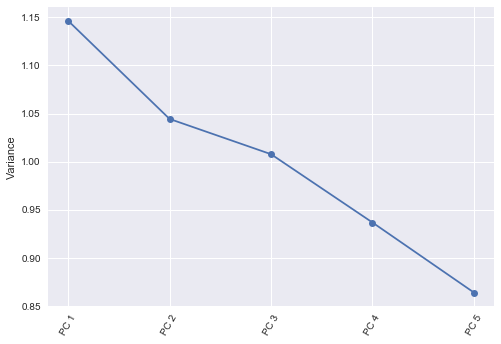

In [9]:
# Standardizing variances of independent variables
standardisedX = scale(X)
standardisedX = pd.DataFrame(standardisedX, index=X.index, columns=X.columns)
standardisedX.apply(np.mean)

# Standardizing variances of independent variables
standardisedX.apply(np.std)

# Creating Scree plot of the PCA's
pca = PCA().fit(standardisedX)
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["PC "+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

screeplot(pca, standardisedX)

The Scree Plot above illustrates that the elbow of the line is around PC 2 or PC 3. Additional analysis using the eigenvalues and eigenvectors will be needed to select the correct amount of principal components to include in the model. 